In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
%matplotlib inline


import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
crime = pd.read_excel('crime_data_by_State_by_City_2013.xls', skiprows = 3, skip_footer=10)

In [148]:
crime.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,2645.0,11.0,1,1.0,NaN,2,7.0,63.0,21.0,39.0,3,NaN,NaN,NaN,NaN
1,NaN,Adamsville,4481.0,19.0,1,0.0,NaN,7,11.0,321.0,58.0,252.0,11,NaN,NaN,NaN,
2,NaN,Addison,744.0,1.0,0,1.0,NaN,0,0.0,25.0,6.0,17.0,2,NaN,NaN,NaN,
3,NaN,Alabaster,31170.0,44.0,0,2.0,NaN,11,31.0,640.0,70.0,544.0,26,NaN,NaN,NaN,NaN
4,NaN,Alexander City,14692.0,119.0,2,16.0,NaN,12,89.0,661.0,121.0,510.0,30,NaN,NaN,NaN,NaN


In [3]:
crime['State'] = crime[['State']].fillna(method= 'ffill')

In [150]:
crime.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,2645.0,11.0,1,1.0,NaN,2,7.0,63.0,21.0,39.0,3,NaN,NaN,NaN,NaN
1,ALABAMA,Adamsville,4481.0,19.0,1,0.0,NaN,7,11.0,321.0,58.0,252.0,11,NaN,NaN,NaN,
2,ALABAMA,Addison,744.0,1.0,0,1.0,NaN,0,0.0,25.0,6.0,17.0,2,NaN,NaN,NaN,
3,ALABAMA,Alabaster,31170.0,44.0,0,2.0,NaN,11,31.0,640.0,70.0,544.0,26,NaN,NaN,NaN,NaN
4,ALABAMA,Alexander City,14692.0,119.0,2,16.0,NaN,12,89.0,661.0,121.0,510.0,30,NaN,NaN,NaN,NaN


In [48]:
crime.shape

(9292, 17)

There are 9292 observations and 17 columns.

In [4]:
crime.columns = crime.columns.str.lower()

In [5]:
crime.columns

Index(['state', 'city', 'population', 'violent\ncrime',
       'murder and\nnonnegligent\nmanslaughter',
       'rape\n(revised\ndefinition)1', 'rape\n(legacy\ndefinition)2',
       'robbery', 'aggravated\nassault', 'property\ncrime', 'burglary',
       'larceny-\ntheft', 'motor\nvehicle\ntheft', 'arson3', 'unnamed: 14',
       'unnamed: 15', 'unnamed: 16'],
      dtype='object')

In [6]:
crime.rename(columns={'murder and\nnonnegligent\nmanslaughter':'murder'
                          ,'rape\n(revised\ndefinition)1':'rape_revised_definition1'
                          ,'rape\n(legacy\ndefinition)2':'rape_legacy_definition2'
                          ,'aggravated\nassault':'assault'
                          ,'property\ncrime':'property_crime'
                          ,'larceny-\ntheft': 'larceny_theft'
                          ,'violent\ncrime' : 'violent_crime'
                          , 'motor\nvehicle\ntheft': 'motor_vehicle_theft'}
                 , inplace=True)

In [154]:
crime.columns

Index(['state', 'city', 'population', 'violent_crime', 'murder',
       'rape_revised_definition1', 'rape_legacy_definition2', 'robbery',
       'assault', 'property_crime', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'arson3', 'unnamed: 14', 'unnamed: 15',
       'unnamed: 16'],
      dtype='object')

In [155]:
crime.isnull().sum()

state                          0
city                           0
population                     3
violent_crime                  4
murder                         0
rape_revised_definition1    3861
rape_legacy_definition2     5433
robbery                        0
assault                        3
property_crime                 4
burglary                       2
larceny_theft                  2
motor_vehicle_theft            0
arson3                       473
unnamed: 14                 9292
unnamed: 15                 9292
unnamed: 16                 9290
dtype: int64

In [7]:
crime[crime['unnamed: 16'].notnull()]

,state,city,population,violent_crime,murder,rape_revised_definition1,rape_legacy_definition2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,unnamed: 14,unnamed: 15,unnamed: 16
1,ALABAMA,Adamsville,4481.0,19.0,1,0.0,NaN,7,11.0,321.0,58.0,252.0,11,NaN,NaN,NaN,
2,ALABAMA,Addison,744.0,1.0,0,1.0,NaN,0,0.0,25.0,6.0,17.0,2,NaN,NaN,NaN,


After checking the value for the column "unnamed: 16" for rows which are not null we can safely drop the columns "unnamed: 14", "unnamed: 15" and , "unnamed: 16"

In [8]:
crime.drop(["unnamed: 14", "unnamed: 15" , "unnamed: 16"], axis = 1, inplace=True)

In [158]:
crime.head()

,state,city,population,violent_crime,murder,rape_revised_definition1,rape_legacy_definition2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,ALABAMA,Abbeville,2645.0,11.0,1,1.0,NaN,2,7.0,63.0,21.0,39.0,3,NaN
1,ALABAMA,Adamsville,4481.0,19.0,1,0.0,NaN,7,11.0,321.0,58.0,252.0,11,NaN
2,ALABAMA,Addison,744.0,1.0,0,1.0,NaN,0,0.0,25.0,6.0,17.0,2,NaN
3,ALABAMA,Alabaster,31170.0,44.0,0,2.0,NaN,11,31.0,640.0,70.0,544.0,26,NaN
4,ALABAMA,Alexander City,14692.0,119.0,2,16.0,NaN,12,89.0,661.0,121.0,510.0,30,NaN


In [159]:
crime[crime.population.isnull()]

,state,city,population,violent_crime,murder,rape_revised_definition1,rape_legacy_definition2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
3062,MARYLAND,Baltimore City Sheriff,NaN,0.0,0,NaN,0.0,0,0.0,0.0,0.0,0.0,0,0.0
6402,OREGON,Black Butte,NaN,0.0,0,0.0,NaN,0,0.0,5.0,0.0,5.0,0,0.0
6484,OREGON,Sunriver,NaN,2.0,0,0.0,NaN,0,2.0,80.0,16.0,60.0,4,0.0


In [9]:
crime.drop(crime[crime.population.isnull()].index, inplace=True)

In [48]:
crime.state.value_counts().head()

PENNSYLVANIA    853
TEXAS           604
ILLINOIS        506
NEW JERSEY      479
CALIFORNIA      462
Name: state, dtype: int64

In [64]:
print(crime[['robbery','murder','population','property_crime']].describe())

            robbery       murder    population  property_crime
count   9289.000000  9289.000000  9.289000e+03     9285.000000
mean      30.995371     1.103133  2.141811e+04      671.245880
std      328.475187     9.871871  1.189963e+05     3438.782366
min        0.000000     0.000000  5.000000e+00        0.000000
25%        0.000000     0.000000  2.318000e+03       36.000000
50%        1.000000     0.000000  5.902000e+03      118.000000
75%        7.000000     0.000000  1.627000e+04      419.000000
max    19170.000000   414.000000  8.396126e+06   141971.000000


In [11]:
crime_ca = crime.loc[crime.state== 'CALIFORNIA',['robbery','murder','population','property_crime']]
print(crime_ca.shape)

crime_pn = crime.loc[crime.state== 'PENNSYLVANIA',['robbery','murder','population','property_crime']]
print(crime_pn.shape)


(462, 4)
(853, 4)


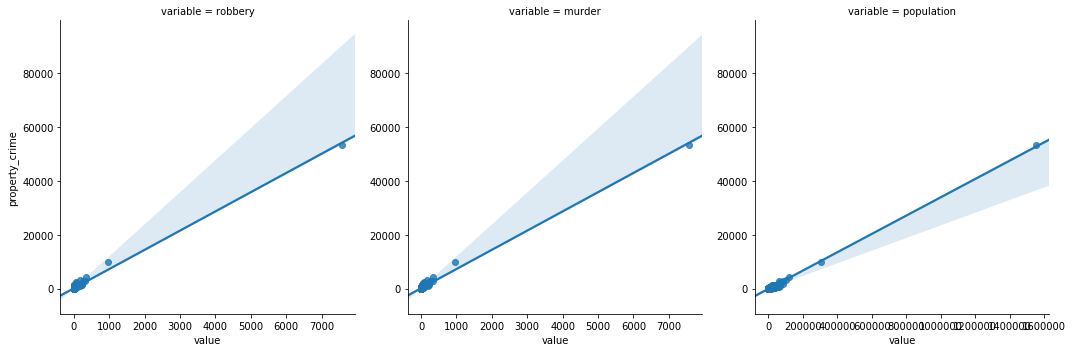

In [21]:
df_wide = crime_pn[['robbery','property_crime','murder','population']]
df_long = pd.melt(df_wide, id_vars = 'property_crime')
sns.lmplot(data = df_long,  x= 'value', y='property_crime', col= 'variable',sharex=False )
plt.show()

In [26]:
crime_pn.sort_values(by='population', ascending=False).head()

,robbery,murder,population,property_crime,property_crime_v2,property_crime_BC,robbery_log,murder_log,population_log
7073,7563,7564,1553154.0,53452.0,53452.0,17.269078,8.931023,8.931155,14.255798
7078,957,958,307633.0,10047.0,10047.0,13.564143,6.863803,6.864848,12.636663
6512,330,331,119278.0,4324.0,4324.0,11.873277,5.799093,5.802118,11.689212
6732,176,177,100815.0,3208.0,3208.0,11.301085,5.170484,5.176150,11.521042
7102,329,330,88108.0,2799.0,2799.0,11.044142,5.796058,5.799093,11.386319


In [27]:
crime_pn = crime_pn[crime_pn.population!= 1553154.0]

In [30]:
crime_pn = crime_pn[crime_pn.population!= 307633.0]

In [31]:
crime_pn.sort_values(by='population', ascending=False).head()

,robbery,murder,population,property_crime,property_crime_v2,property_crime_BC,robbery_log,murder_log,population_log
6512,330,331,119278.0,4324.0,4324.0,11.873277,5.799093,5.802118,11.689212
6732,176,177,100815.0,3208.0,3208.0,11.301085,5.170484,5.176150,11.521042
7102,329,330,88108.0,2799.0,2799.0,11.044142,5.796058,5.799093,11.386319
7244,228,229,82772.0,1852.0,1852.0,10.282775,5.429346,5.433722,11.323845
7140,72,73,75733.0,2277.0,2277.0,10.660523,4.276666,4.290459,11.234969


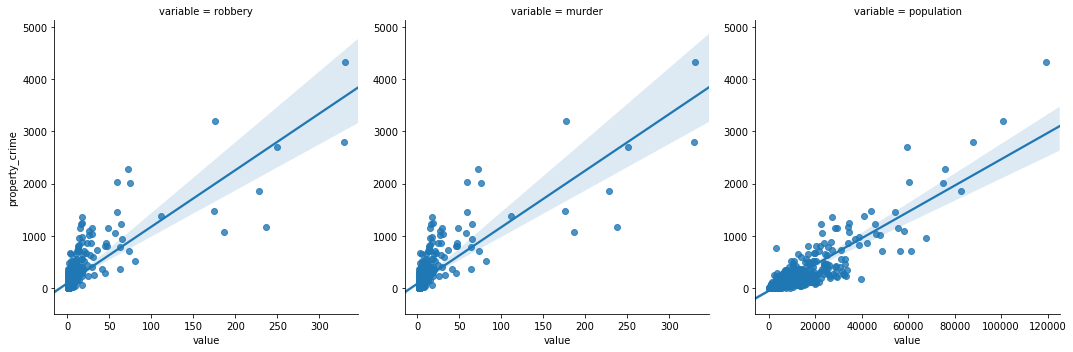

In [32]:
# the linearity is nice if we work without removing the ouliers. for both CA and Pennsylvania
df_wide = crime_pn[['robbery','property_crime','murder','population']]
df_long = pd.melt(df_wide, id_vars = 'property_crime')
sns.lmplot(data = df_long,  x= 'value', y='property_crime', col= 'variable',sharex=False )
plt.show()


Coefficients: 
 [[ 2.70249155  2.70249155  0.01731196]]

Intercept: 
 [-19.94011018]

R-squared:
0.875079888006


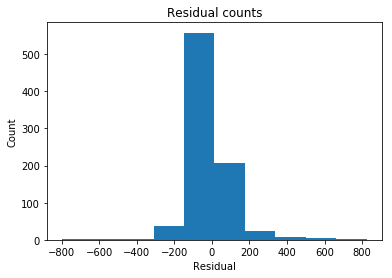

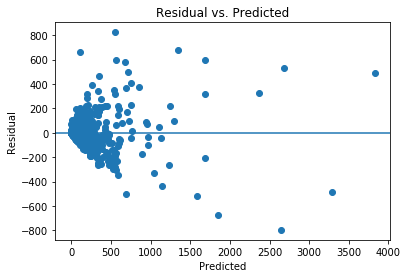

In [33]:
regr = linear_model.LinearRegression()
Y = crime_pn['property_crime'].values.reshape(-1, 1)
X = crime_pn[['robbery','murder','population']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = crime_pn['property_crime']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



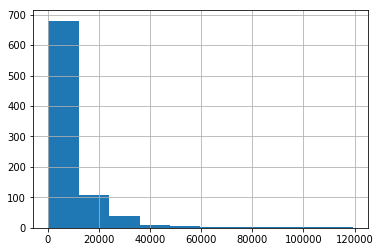

In [35]:
crime_pn.population.hist()
plt.show()

In [36]:
crime_pn['property_crime_v2'] = crime_pn['property_crime'].apply(lambda x: x+1 if x == 0 else x)

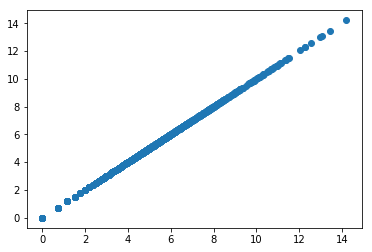

In [37]:
from scipy.stats import boxcox
bc = boxcox(crime_pn['property_crime_v2'])

crime_pn['property_crime_BC'] = bc[0]
plt.scatter(crime_pn['property_crime_BC'], bc[0])
plt.show()


In [38]:
crime_pn['robbery'] = crime_pn['robbery'] +1
crime_pn['robbery_log'] = np.log(crime_pn['robbery'])
crime_pn['murder'] = crime_pn['robbery'] +1
crime_pn['murder_log'] = np.log(crime_pn['murder'])
crime_pn['population'] = crime_pn['population'] + 1
crime_pn['population_log'] = np.log(crime_pn['population'])

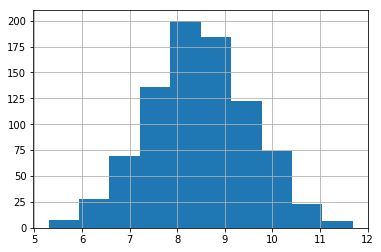

In [39]:
crime_pn.population_log.hist()
plt.show()


Coefficients: 
 [[ 4.20060662 -3.72448894  1.558551  ]]

Intercept: 
 [-7.34240197]

R-squared:
0.804033018371


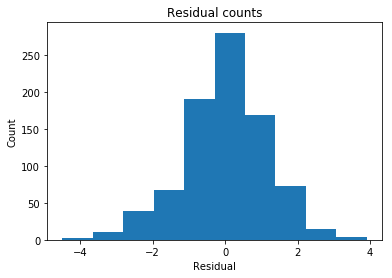

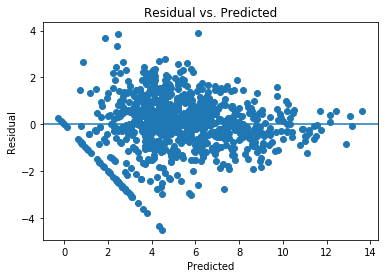

In [40]:
regr = linear_model.LinearRegression()
Y = crime_pn['property_crime_BC'].values.reshape(-1, 1)
X = crime_pn[['robbery_log','murder_log','population_log']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = crime_pn['property_crime_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [42]:
from scipy.stats import boxcox
bc = boxcox(crime_pn['robbery'])

crime_pn['robbery_BC'] = bc[0]


In [43]:
from scipy.stats import boxcox
bc = boxcox(crime_pn['murder'])

crime_pn['murder_BC'] = bc[0]


In [45]:
from scipy.stats import boxcox
bc = boxcox(crime_pn['population'])

crime_pn['population_BC'] = bc[0]


Coefficients: 
 [[-22.23487402  79.21057999   1.70544188]]

Intercept: 
 [-42.44357416]

R-squared:
0.799613910292


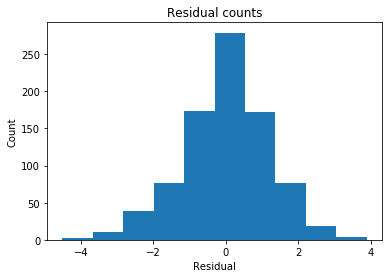

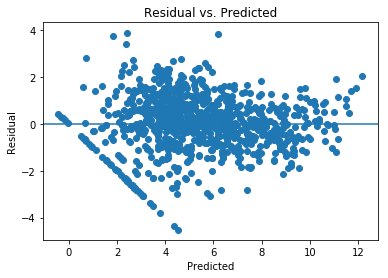

In [47]:
regr = linear_model.LinearRegression()
Y = crime_pn['property_crime_BC'].values.reshape(-1, 1)
X = crime_pn[['robbery_BC','murder_BC','population_BC']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = crime_pn['property_crime_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



The above looks better than others.

In [52]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
linear_formula = 'property_crime ~ robbery+murder+population'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_pn).fit()
print('coefficients of our model are : ' )
print(lm.params)
print()
print('p-values as a significance test for each of the coefficients : ')
print(lm.pvalues)
print()
print('R2 : ')
print(lm.rsquared)
print()
print('Confidence intervals : ')
print(lm.conf_int())


coefficients of our model are : 
Intercept    -16.908270
robbery       11.156627
murder        -5.751644
population     0.017312
dtype: float64

p-values as a significance test for each of the coefficients : 
Intercept      8.292602e-07
robbery        6.659329e-11
murder         8.914865e-04
population    5.580115e-180
dtype: float64

R2 : 
0.875079888006

Confidence intervals : 
                    0          1
Intercept  -23.592002 -10.224538
robbery      7.845299  14.467954
murder      -9.137157  -2.366130
population   0.016397   0.018227


In [53]:

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
linear_formula = 'property_crime_BC ~ robbery_BC+murder_BC+population_BC'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_pn).fit()
print('coefficients of our model are : ' )
print(lm.params)
print()
print('p-values as a significance test for each of the coefficients : ')
print(lm.pvalues)
print()
print('R2 : ')
print(lm.rsquared)
print()
print('Confidence intervals : ')
print(lm.conf_int())


coefficients of our model are : 
Intercept       -42.443574
robbery_BC      -22.234874
murder_BC        79.210580
population_BC     1.705442
dtype: float64

p-values as a significance test for each of the coefficients : 
Intercept         1.357436e-06
robbery_BC        5.992997e-03
murder_BC         5.428843e-04
population_BC    1.829001e-155
dtype: float64

R2 : 
0.799613910292

Confidence intervals : 
                       0           1
Intercept     -59.563494  -25.323654
robbery_BC    -38.075182   -6.394566
murder_BC      34.430877  123.990283
population_BC   1.604617    1.806267


In [54]:
# Test your model with different holdout groups.
target = crime_pn['property_crime_BC'].values.reshape(-1, 1)
data = crime_pn[['robbery_BC','murder_BC','population_BC']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))


With 20% Holdout: 0.794035637178


In [57]:
from sklearn.model_selection import cross_val_score
ten_fold = cross_val_score(regr, data, target, cv=10)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

The Average Accuracy :  0.791146615284
Standard Deviation :  0.0291097386989
